In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers,utils
import sklearn

In [2]:
# Load our csv into a dataframe with column names
url = "D:/MLwork/.venv/ML_LAB/iris.csv"
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset=pd.read_csv(url,names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object


sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

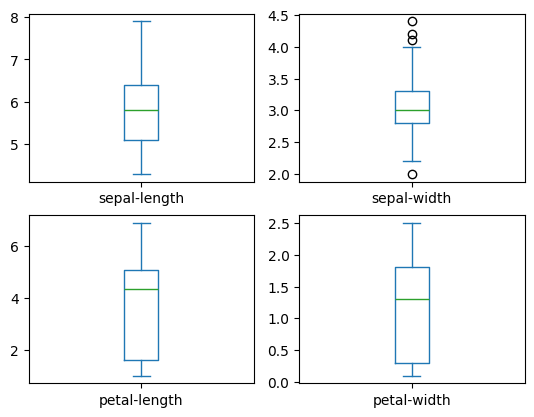

In [4]:
print(dataset.dtypes)

import pandas as pd

# Convert columns to numeric, forcing errors to NaN
dataset['sepal-length'] = pd.to_numeric(dataset['sepal-length'], errors='coerce')
dataset['sepal-width'] = pd.to_numeric(dataset['sepal-width'], errors='coerce')
dataset['petal-length'] = pd.to_numeric(dataset['petal-length'], errors='coerce')
dataset['petal-width'] = pd.to_numeric(dataset['petal-width'], errors='coerce')

# Now plot the box plot
dataset.plot(kind='box', subplots=True, layout=(2, 2))


In [5]:
array=dataset.values

data=array[:,0:4]
print(data.shape)

labels=array[:,4]
print(labels.shape)

(150, 4)
(150,)


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
labels = encoder.fit_transform(labels)

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
labels=pd.get_dummies(labels).values
labels[:5]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [8]:
data = np.asarray(data).astype('float32')

In [9]:
from sklearn.model_selection import train_test_split

train_data, validation_data, train_labels, validation_labels=train_test_split(data,labels, test_size=0.20, random_state=1)


In [10]:
print("Train Data Shape: ",train_data.shape)
print("Train Labels Shape: ",train_labels.shape)
print("Validation Data Shape: ",validation_data.shape)
print("validation labels Shape: ",validation_labels.shape)


Train Data Shape:  (120, 4)
Train Labels Shape:  (120, 3)
Validation Data Shape:  (30, 4)
validation labels Shape:  (30, 3)


In [11]:

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

d:\MLwork\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history=model.fit(train_data,train_labels, epochs=25, batch_size=10)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6772 - loss: 0.7119 
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6983 - loss: 0.6284 
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6700 - loss: 0.6111 
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6403 - loss: 0.6023 
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7497 - loss: 0.4831 
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7478 - loss: 0.4416 
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6700 - loss: 0.4795 
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7315 - loss: 0.4168 
Epoch 9/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7121 - loss: 0.4111 
Epoch 10/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7157 - loss: 0.4125 
Epoch 11/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7503 - loss: 0.4135 
Epoch 12/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8002 - loss: 0.4239 
Epoch 13/25
12/12 ━━━━━━━━━━━━━━━━━━━